<table>
    <tr>
        <td><img src="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/Logo_EICT_horizontal_ESPANOL%20(1).png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue"> Regresión </p> Métodos de Regresión </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Machine Learning </p></tp>
            <tp><p style="font-size:115%;text-align:center">A. Supervisado</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

# <FONT SIZE=5 COLOR="purple"> 1. Concepto de Regresión </FONT>

**Modelo de regresión:** es el modelo en el que se busca establecer la relación entre un cierto número de características y una variable objetivo continua. Es decir, la relación entre la variable dependiente $y$ y las variables predictoras $x_1, x_2 , \dots , x_n$.

En los modelos de regresión no se predice una clase, sino un valor continuo.

Anteriormente habíamos examinado los diferentes métodos de clasificación, conocidos como *classifier*. En esta sección revisaremos las instrucciónes para generar las regresiones (regressor).

https://keepcoding.io/blog/como-funciona-el-k-nn-en-regresion/

https://fhernanb.github.io/libro_mod_pred/arb-de-regre.html

https://www.cienciadedatos.net/documentos/py07_arboles_decision_python.html

https://towardsdatascience.com/random-forest-regression-5f605132d19d

## <FONT SIZE=4 COLOR="blue"> 1.1 k-Nearest Neighbors (kNN) para regresión </FONT>

En lugar de clasificar una muestra, el kNN para regresión predice un valor numérico, como sigue:

1. **Identificación de los vecinos más cercanos**: Dado un nuevo punto de datos, el algoritmo busca los **k** puntos más cercanos en el espacio de características (según una medida de distancia como la euclidiana).
   
2. **Cálculo del valor predicho**: El valor de salida para el punto nuevo se calcula promediando los valores de las etiquetas de los **k** vecinos más cercanos. Es decir:
$$   \hat{y} = \frac{1}{k} \sum_{i=1}^{k} y_i $$
   
donde $ y_i $ son las etiquetas de los k-vecinos más cercanos.

3. **Suavizado del resultado**: Como resultado, el valor de salida es continuo, lo que convierte al kNN en una técnica válida para regresión.

## <FONT SIZE=4 COLOR="blue"> 1.2 Árboles de decisión para regresión </FONT>

En los árboles de decisión para regresión, el procedimiento también cambia respecto al de clasificación:

1. **División del conjunto de datos**: El árbol se construye dividiendo el conjunto de datos en ramas con base en los valores de las características. Sin embargo, en lugar de buscar divisiones que maximicen la ganancia de información o el índice de Gini (usado en clasificación), en regresión se busca minimizar la **varianza** o el **error cuadrático medio** (MSE, por sus siglas en inglés).

2. **Predicción**: Una vez que el árbol está entrenado, la predicción para un nuevo punto de datos se realiza navegando por el árbol desde la raíz hasta una hoja. El valor en la hoja no es una clase, sino un valor promedio de las etiquetas de los datos que caen en esa hoja.

3. **Criterio de división**: Para cada nodo, el árbol selecciona la característica y el punto de división que minimicen la suma del error cuadrático medio en los subconjuntos hijos.

El modelo final hace una predicción basada en los valores promedio de los datos en los nodos terminales, obteniendo así una predicción numérica.

### Comparación:
- En **kNN para regresión**, la predicción es un promedio de los vecinos cercanos.
- En **árboles de decisión para regresión**, la predicción es el valor promedio de los datos en las hojas del árbol.

## <FONT SIZE=4 COLOR="blue"> 1.3 Error Cuadrático Medio </FONT>

El **Error Cuadrático Medio** (MSE, por sus siglas en inglés de *Mean Squared Error*) es una medida de la calidad de un modelo de regresión que cuantifica la diferencia promedio entre los valores predichos por el modelo y los valores reales de las observaciones.

El MSE es especialmente útil para medir el rendimiento en problemas de regresión, ya que da una idea de cuán lejos están las predicciones del modelo respecto a los valores reales en promedio.

Este valor se define como el promedio de los cuadrados de las diferencias entre los valores reales $y_i $ y los valores predichos $\hat{y}_i$:

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

donde:

- $n$ es el número total de ejemplos en el conjunto de datos.

- $y_i$ es el valor real para la observación $i$.

- $\hat{y}_i$ es el valor predicho por el modelo para la observación $i$.

**Explicación de la fórmula**

a. **Diferencia**: Para cada punto de datos, calculamos la diferencia entre el valor real $y_i$ y el valor predicho $\hat{y}_i$.
   
b. **Cuadrado de la diferencia**: Elevamos al cuadrado cada una de estas diferencias. Esto garantiza que los errores positivos y negativos no se cancelen entre sí y penaliza más los errores grandes.

c. **Promedio**: Sumamos los cuadrados de las diferencias y dividimos por el número total de puntos de datos para obtener el promedio de esos errores cuadráticos.

El MSE siempre es positivo y un valor más bajo de MSE indica un mejor ajuste del modelo a los datos.


In [1]:
# Para gráficos y data.frames
import pandas as pd
import numpy  as np

# librerías para graficar
import plotly.express     as px
import matplotlib.pyplot  as plt
import seaborn            as sns


# Dividir los datos entrenamiento y prueba
from sklearn.model_selection     import train_test_split
from sklearn.feature_selection   import RFE

# Para preprocesamiento: escalador
from sklearn.preprocessing       import StandardScaler

# Modelo de regresión lineal
from sklearn.linear_model        import LinearRegression
from sklearn.svm                 import SVR
from sklearn.neighbors           import KNeighborsRegressor
from sklearn.tree                import DecisionTreeRegressor
from sklearn.ensemble            import RandomForestRegressor

# Métricas
from sklearn                     import metrics
from sklearn.metrics             import mean_squared_error, r2_score

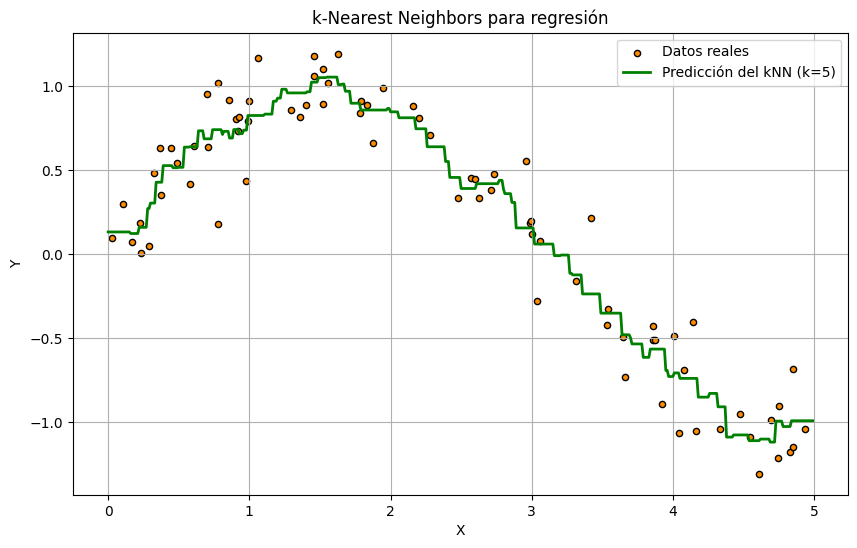

In [2]:
# gráfico para knn
from sklearn.neighbors import KNeighborsRegressor

# Generamos datos de ejemplo
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.2

# Creamos un modelo de kNN para regresión
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X, y)

# Predicciones
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_knn_pred = knn_regressor.predict(X_test)

# Gráfica
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Datos reales")
plt.plot(X_test, y_knn_pred, color="green", label="Predicción del kNN (k=5)", linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("k-Nearest Neighbors para regresión")
plt.legend()
plt.grid(True)

plt.show()


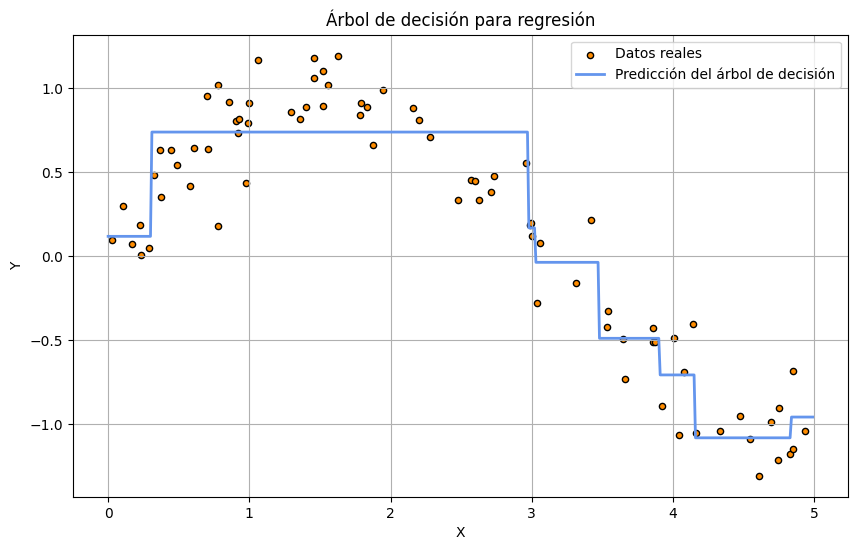

In [3]:
# gráfico para árboles de decisión
import matplotlib.pyplot as plt
import numpy as np
from  sklearn.tree import DecisionTreeRegressor

# Generamos datos de ejemplo
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.2

# Ajustamos un árbol de decisión para regresión
tree_regressor = DecisionTreeRegressor(max_depth=3)
tree_regressor.fit(X, y)

# Predicciones
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = tree_regressor.predict(X_test)

# Gráfica
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Datos reales")
plt.plot(X_test, y_pred, color="cornflowerblue", label="Predicción del árbol de decisión", linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Árbol de decisión para regresión")
plt.legend()
plt.grid(True)

plt.show()

# <FONT SIZE=5 COLOR="purple"> Ejemplo Modelo de Regresión </FONT>

Vamos a considerar los siguientes datos relacionados con la inversión en publicidad en diferentes medios y las ventas.

El obejetivo es hacer un modelo de regresión lineal múltiple para predecir las ventas en función de las variables de pauta publicitaria en diferentes medios.

Se describen las variables independientes: TV, Radio Newpaper y la variable dependiente Sales.

Valor de etiqueta o variable objetivo dependiente(ventas): que significa el volumen de ventas del producto correspondiente

Las variables independientes: (TV, Radio, Periódico, WEB):

TV: para un solo producto en un mercado determinado, el costo de la publicidad en TV (en miles) Radio: costos de publicidad invertidos en medios de difusión Periódico: costos publicitarios para medios periodísticos.

## <FONT SIZE=5 COLOR="green"> 1.1 Carga y exploración de los datos</FONT>

In [4]:
ventas = pd.read_csv("https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/Ventas.csv", sep = ";" , decimal = "," )
ventas

,Unnamed: 0,Newspaper,TV,Radio,Web,Sales
0,0,46.0,204.1,32.9,245.774960,19.0
1,1,52.9,195.4,47.7,148.095134,22.4
2,2,114.0,67.8,36.6,202.638903,12.5
3,3,55.8,281.4,39.6,41.755313,24.4
4,4,18.3,69.2,20.5,210.489910,11.3
...,...,...,...,...,...,...
195,195,13.8,38.2,3.7,248.841073,7.6
196,196,8.1,94.2,4.9,118.041856,9.7
197,197,6.4,177.0,9.3,213.274671,12.8
198,198,66.2,283.6,42.0,237.498064,25.5


In [5]:
# eliminar la primera columna
ventas = ventas.drop(ventas.columns[0], axis=1)

In [6]:
corr = ventas.corr()
corr

,Newspaper,TV,Radio,Web,Sales
Newspaper,1.000000,0.056648,0.354104,-0.057759,0.228299
TV,0.056648,1.000000,0.054809,0.012576,0.782224
Radio,0.354104,0.054809,1.000000,-0.122673,0.576223
Web,-0.057759,0.012576,-0.122673,1.000000,0.002108
Sales,0.228299,0.782224,0.576223,0.002108,1.000000


<Axes: >

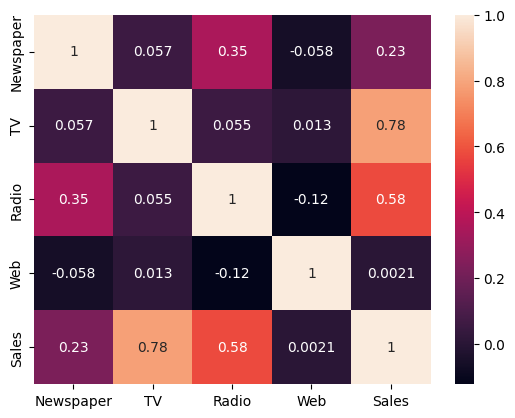

In [7]:
# matriz de correlación
sns.heatmap(corr, annot = True,
            yticklabels=corr.columns,
            xticklabels=corr.columns)

Primero, seleccionamos las variables predictoras y la variable objetivo

In [8]:
# variable objetivo
y = ventas['Sales']
# variables predictoras
X = ventas.drop('Sales', axis=1)

In [9]:
# conjunto de entrenamiento y prueba
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               train_size=0.70,
                                               random_state=123)

In [10]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

## <FONT SIZE=5 COLOR="green"> 1.2 Modelo con KNN </FONT>

In [11]:
# librería
from sklearn.neighbors import KNeighborsRegressor
# modelo
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train_s, y_train)
y_pred = KNN.predict(X_test_s)
# métricas
print("R2",r2_score(y_test, y_pred))                             # coeficiente de determinación
print('MSE', mean_squared_error(y_test, y_pred))                 # error cuadrático medio
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))        # raíz error cuadrático medio

R2 0.9214648161974899
MSE 2.1551066666666667
RMSE 1.468028155951604


## <FONT SIZE=5 COLOR="green"> 1.3 Modelo con Árboles de Decisión </FONT>


In [12]:
# modelo
Tree_reg = DecisionTreeRegressor(random_state= 0)
Tree_reg.fit(X_train_s, y_train)
y_pred = Tree_reg.predict(X_test_s)
# evaluación del modelo
print("R2",r2_score(y_test, y_pred))                             # coeficiente de determinación
print('MSE', mean_squared_error(y_test, y_pred))                 # error cuadrático medio
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))        # raíz error cuadrático medio

R2 0.963734696620988
MSE 0.9951666666666665
RMSE 0.9975804061160517


## <FONT SIZE=5 COLOR="green"> 1.4 Modelo con Regresión Múltiple </FONT>

In [13]:
# modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train_s,y_train)
y_pred = modelo.predict(X_test_s)
# evaluación del modelo
print("R2",r2_score(y_test, y_pred))                             # coeficiente de determinación
print('MSE', mean_squared_error(y_test, y_pred))                 # error cuadrático medio
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))        # raíz error cuadrático medio

R2 0.9103361643399669
MSE 2.460491217232827
RMSE 1.568595300653686
